# Set up YOLOv4 Environment

# **Load** python code from **github**

In [1]:
cloned_repo =  !git clone https://github.com/BIueMan/DL_Project-046211

This part is set the ground for **YOLOb4** model.

**This restarts the runtime--ignore any error messages**, just continue to run the code


In [ ]:
%cd /content/DL_Project-046211
try:
  !pip install -r requirements.txt
  # This restarts the runtime--ignore any error messages
  import os
  os.kill(os.getpid(), 9)
except:
  pass


/content/DL_Project-046211
     |████████████████████████████████| 20.2 MB 1.3 MB/s 
     |████████████████████████████████| 753.4 MB 7.2 kB/s 
     |████████████████████████████████| 26.5 MB 84.1 MB/s 
     |████████████████████████████████| 12.6 MB 55.2 MB/s 
     |████████████████████████████████| 59 kB 8.5 MB/s 
     |████████████████████████████████| 124 kB 85.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.

# Download pretrain yolov4 **weights**

the weights have already been converted to PyTorch, for general object detection.

In [1]:
%cd /content/DL_Project-046211/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
!gdown --id 1O6cuInJbA4Hi6snNw949dq-WUILxiaPC

/content/DL_Project-046211/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/DL_Project-046211/cfg/yolov4.conv.137.pth
100% 170M/170M [00:00<00:00, 176MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O6cuInJbA4Hi6snNw949dq-WUILxiaPC
To: /content/DL_Project-046211/cfg/Yolov4_circet_d.pth
100% 256M/256M [00:03<00:00, 77.1MB/s]


# Download Custom Dataset

Export Dataset from **Roboflow**


In [2]:
%cd /content/
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L "https://app.roboflow.com/ds/i2tR0MHH0I?key=BgEVczKNdO" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1760      0 --:--:-- --:--:-- --:--:--  1760
100 33.5M  100 33.5M    0     0  32.6M      0  0:00:01  0:00:01 --:--:--  764M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: train/
 extracting: train/C103_D1_P1_jpg.rf.159b8e74c4f24d936473fbe984977322.jpg  
 extracting: train/C103_D1_P1_jpg.rf.b4bf2c65d92d2197e2a1fb60b79ed244.jpg  
 extracting: train/C103_D1_P1_jpg.rf.bca1d22ed682927a822f4da899cc1ae5.jpg  
 extracting: train/C103_D1_P2_jpg.rf.2d29254708703b91a6d4569475b54220.jpg  
 extracting: train/C103_D1_P2_jpg.rf.7bb556b876c12e1ec44ed6e53be71963.jpg  
 extracting: train/C103_D1_P2_jpg.rf.a3ee49dcd7d3c45f567bbb4a94f16443.jpg  
 extracting: train/C103_D1_P3_jpg.rf.92d155bc8e4a8d15707ec0ae9b3443ea.jpg  
 extracting: train/C103_

In [3]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

Count the number of classes in the dataset, to resize the output of the model

In [4]:
import time
time.sleep(2)

def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print("number of classes - ", num_classes)

number of classes -  12


# **Train** YOLOv4 model with dataset

In [11]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./DL_Project-046211/train.py -b 2 -s 1 -l 0.0001 -g 0 -pretrained /content/DL_Project-046211/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 70

log file path:log/log_2022-01-21_16-43-54.txt
2022-01-21 16:43:54,508 train.py[line:491] INFO: Using device cuda
2022-01-21 16:43:57,920 train.py[line:283] INFO: Starting training:
        Epochs:          70
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.0001
        Training size:   786
        Validation size: 66
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 12
        Train label path:train.txt
        Pretrained:
    
TRAIN: Epoch 1/70:   0%| | 0/786 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
TRAIN: Epoch 1/70: 100%|█| 786/786 [03:09<00:00,  
2022-01-21 16:47:08,122 train.py[line:375] INFO: Checkpoint 1 saved !
VAL: Epoch 1/70: 100%|█| 66/66 [00:12<00:00,  5.43
Epoch: 1 | Total t

# Load Trained Weights for Custom Detection

at the end of the train, you will have
1.   a list of Train_loss.txt
2.   a list of Valid_loss.txt
3.   checkpoints dir, to test the model



first we show all the checkpolint we saved

In [12]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch15.pth	Yolov4_epoch1.pth   Yolov4_epoch5.pth
Yolov4_epoch11.pth  Yolov4_epoch16.pth	Yolov4_epoch20.pth  Yolov4_epoch6.pth
Yolov4_epoch12.pth  Yolov4_epoch17.pth	Yolov4_epoch2.pth   Yolov4_epoch7.pth
Yolov4_epoch13.pth  Yolov4_epoch18.pth	Yolov4_epoch3.pth   Yolov4_epoch8.pth
Yolov4_epoch14.pth  Yolov4_epoch19.pth	Yolov4_epoch4.pth   Yolov4_epoch9.pth


In [13]:
#choose random validation image
import os
val_images = [f for f in os.listdir('valid') if f.endswith('.jpg')]
import random
img_path = "valid/" + random.choice(val_images);

test model from checkpoint (one in dir checkpoints/)

In [14]:
%%time
##change the epoch here to the one you would like to use for inference
!python /content/DL_Project-046211/models.py {num_classes} checkpoints/Yolov4_epoch19.pth {img_path} valid/_classes.txt

resistor: 0.999956
text: 0.999779
text: 0.999609
resistor: 0.999990
resistor: 0.999951
resistor: 0.999475
junction: 1.000000
junction: 0.999890
terminal: 0.520611
junction: 0.999937
junction: 0.999893
junction: 0.999994
resistor: 0.999563
text: 0.949253
terminal: 0.955525
junction: 1.000000
text: 0.995778
text: 0.996294
capacitor: 0.295604
junction: 0.999929
junction: 0.999990
junction: 0.999999
capacitor: 0.428789
text: 0.867587
text: 0.994705
junction: 0.999992
transistor: 0.554156
junction: 0.999997
transistor: 0.534050
junction: 0.999971
junction: 0.999794
junction: 0.999965
terminal: 0.257482
junction: 0.999846
junction: 0.978877
capacitor: 0.475317
junction: 0.999806
junction: 0.999907
save plot results to predictions.jpg
CPU times: user 39 ms, sys: 11.6 ms, total: 50.6 ms
Wall time: 5.14 s


print image with labels

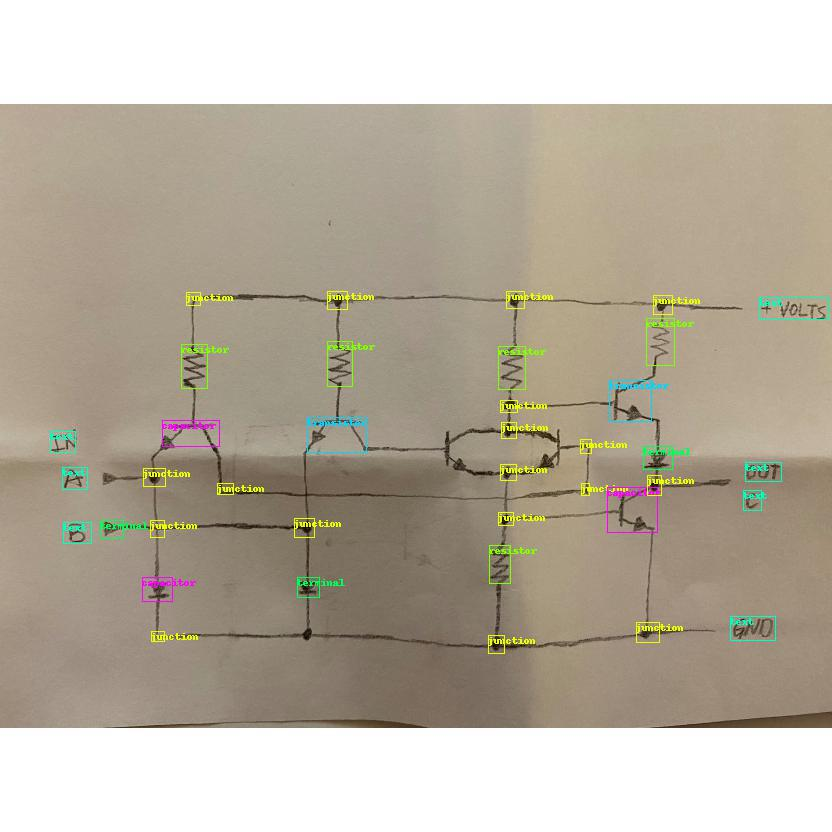

In [15]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')